<a href="https://colab.research.google.com/github/seungwoo-Jang/modu_quest/blob/main/EXPLORATION_RS4/E03/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

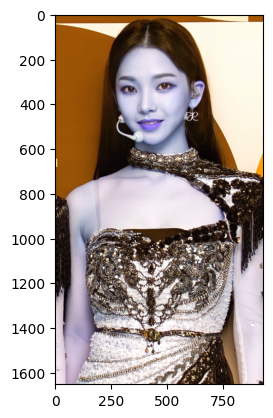

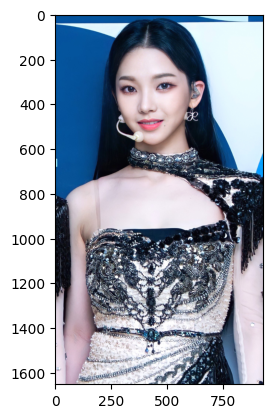

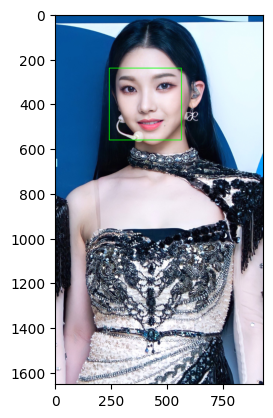

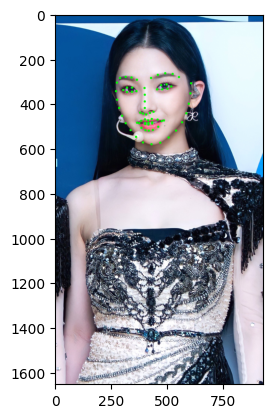

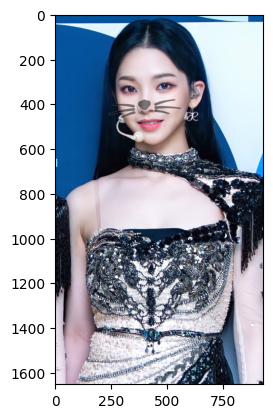

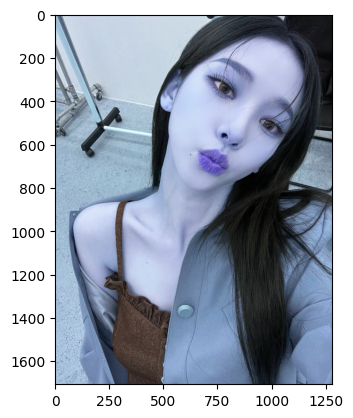

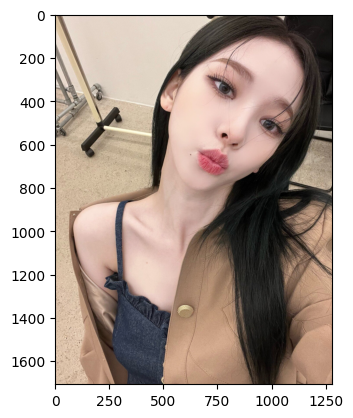

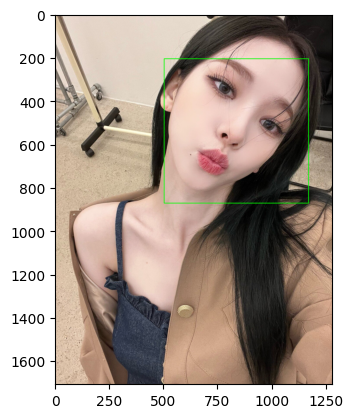

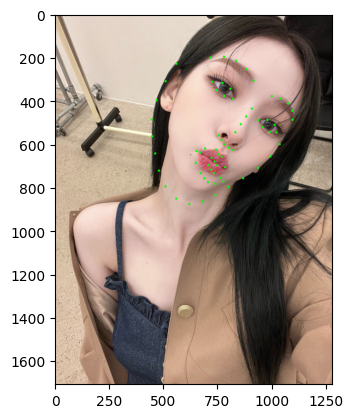

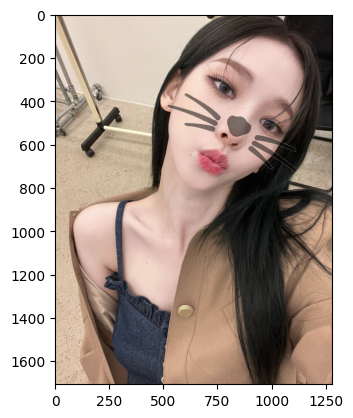

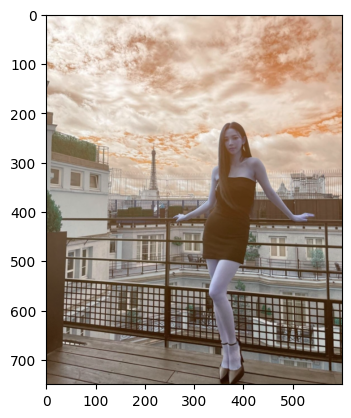

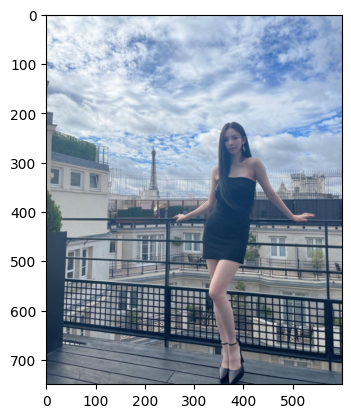

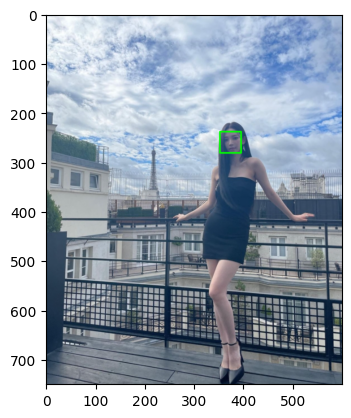

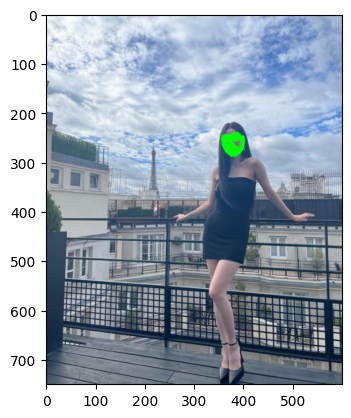

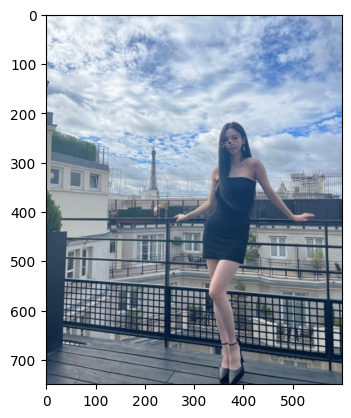

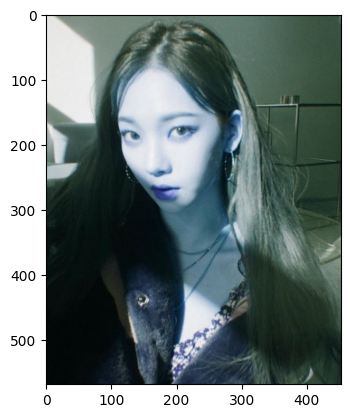

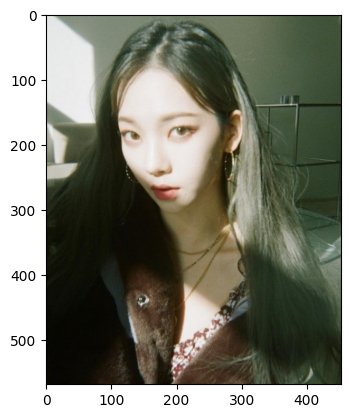

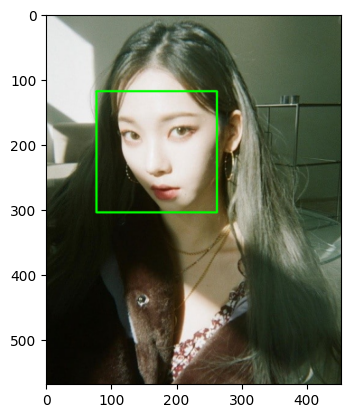

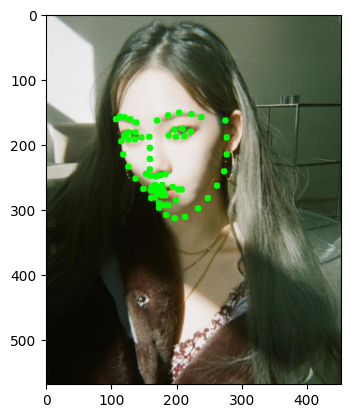

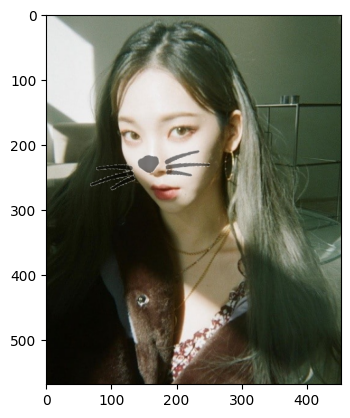

In [4]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib


def add_sticker(img_path, sticker_path):
  img_bgr = cv2.imread(img_path) #rbg 순서가 다름
  img_show = img_bgr.copy()
  plt.imshow(img_bgr)
  plt.show()

  img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #rgb 순서 맞추기
  plt.imshow(img_rgb)
  plt.show()

  detector_hog = dlib.get_frontal_face_detector()

  dlib_rects = detector_hog(img_rgb,1) #찾은 얼굴 좌표(좌,상,우,하)

  img_rect = img_rgb.copy()  
  for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    cv2.rectangle(img_rect, (l,t),
                (r,b),(0,255,0),
                2,lineType=cv2.LINE_AA
                )
  plt.imshow(img_rect)
  plt.show()

  model_path = '/content/drive/MyDrive/Colab Notebooks/EXPLORATION_data/E03/shape_predictor_68_face_landmarks.dat'
  landmark_predictor = dlib.shape_predictor(model_path)
  #좌측부터 0 시작 > 얼굴형 > 눈썹 > 코 > 눈 > 입
  list_landmarks = []
  for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x,p.y), points.parts()))
    list_landmarks.append(list_points)

  #코 30, 입 66, 턱 8, 미간 27
  img_landmark = img_rgb.copy()  
  for landmark in list_landmarks:
    for point in landmark:
      cv2.circle(img_landmark, point,5,(0,255,0),-1)
  plt.imshow(img_landmark)
  plt.show()

  for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    y = landmark[30][1] + dlib_rect.height()//2
    w = h = dlib_rect.width()

  img_sticker = cv2.imread(sticker_path)
  img_sticker = cv2.resize(img_sticker, (w,h))
  refined_x = x - w // 2
  refined_y = y - h

  if refined_x < 0:
    img_sticker = img_sticker[:,-refined_x:]
    refined_x = 0
  if refined_y < 0:
    img_sticker = img_sticker[-refined_y:,:]
    refined_y = 0

  # 이미지 회전
  # 기울기
  slope = (landmark[66][0] - landmark[27][0]) / (landmark[66][1] - landmark[27][1])
  # 기울기를 이용하여 각도 계산
  angle = (np.arctan(slope) * 180 / np.pi) * 0.8
  rows, cols = img_sticker.shape[:2]
  M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
  rotated_img = cv2.warpAffine(img_sticker, M, (cols, rows),borderValue=(255, 255, 255))

  img_sticker_apply = img_rgb.copy()
  sticker_area = img_sticker_apply[refined_y:refined_y+img_sticker.shape[0], 
                          refined_x:refined_x+img_sticker.shape[1]
                          ]
  result = cv2.addWeighted(sticker_area, 0.5, rotated_img, 0.5, 0,dtype=cv2.CV_8U)
  img_sticker_apply[refined_y:refined_y+img_sticker.shape[0], 
                          refined_x:refined_x+img_sticker.shape[1]
                          ] = np.where(rotated_img==255,sticker_area,result).astype(np.uint8)

  plt.imshow(img_sticker_apply)
  plt.show()
straight_img_path = '/content/drive/MyDrive/Colab Notebooks/EXPLORATION_data/E03/straight.png'
diagonal_img_path = '/content/drive/MyDrive/Colab Notebooks/EXPLORATION_data/E03/diagonal.png'
far_img_path = '/content/drive/MyDrive/Colab Notebooks/EXPLORATION_data/E03/far.png'
light_img_path = '/content/drive/MyDrive/Colab Notebooks/EXPLORATION_data/E03/light.png'
sticker_path = '/content/drive/MyDrive/Colab Notebooks/EXPLORATION_data/E03/cat-whiskers.png'

add_sticker(straight_img_path, sticker_path)
add_sticker(diagonal_img_path, sticker_path)
add_sticker(far_img_path, sticker_path)
add_sticker(light_img_path, sticker_path)
